# Bimodal Gaussian Posterior - NPE_C method

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

In [2]:
import lfi
import sbi
import torch
import numpy as np

2024-12-20 12:51:13.003 | INFO     | lfi.config:<module>:11 - PROJ_ROOT path is: C:\Users\Theodora\Documents\master2\sbi


In [3]:
from lfi import priors, simulators
import lfi.inference.from_sbi

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## D = 2
### budget: 500

In [5]:
np.random.seed(21355)
torch.manual_seed(21)

In [4]:
D = 2
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high = 10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = - 3
posterior_modes[1,:] = +3

In [5]:
density_estimator_fun = sbi.neural_nets.posterior_nn(
    model='nsf',
    hidden_features=100,# 20, # 50,
    num_transforms=8,# 2, # 5,
    z_score_x="independent",
    z_score_theta="independent",
)

In [6]:
inference = lfi.inference.from_sbi.NPECSingleRound(
    prior = prior.return_sbi_object(),
    simulator = sim.sample_pytorch,
    observation = observation,
)

In [8]:
samples, time = inference.fit_and_sample(budget=500, num_samples=100, density_estimator=density_estimator_fun)

  0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 163 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 19.94 seconds


C:\Users\Theodora\anaconda3\envs\pytorch2\lib\site-packages\nflows\transforms\lu.py:80: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\BatchLinearAlgebra.cpp:2198.)
  outputs, _ = torch.triangular_solve(


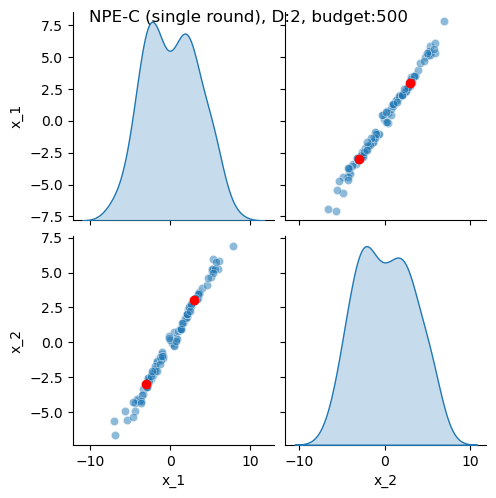

In [9]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=500,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

### budget: 1000

In [6]:
np.random.seed(21355)
torch.manual_seed(21)

In [7]:
D = 2
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high = 10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = - 3
posterior_modes[1,:] = +3

In [9]:
density_estimator_fun = sbi.neural_nets.posterior_nn(
    model='nsf',
    hidden_features=100,# 20, # 50,
    num_transforms=8,# 2, # 5,
    z_score_x="independent",
    z_score_theta="independent",
)

In [10]:
inference = lfi.inference.from_sbi.NPECSingleRound(
    prior = prior.return_sbi_object(),
    simulator = sim.sample_pytorch,
    observation = observation,
)

In [11]:
samples, time = inference.fit_and_sample(budget=1000, num_samples=100, density_estimator=density_estimator_fun)

  0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 418 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 52.74 seconds


C:\Users\Theodora\anaconda3\envs\pytorch2\lib\site-packages\nflows\transforms\lu.py:80: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\BatchLinearAlgebra.cpp:2198.)
  outputs, _ = torch.triangular_solve(


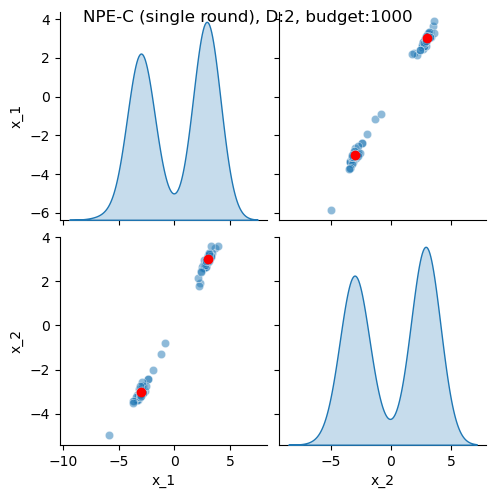

In [12]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=1000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

### budget: 5000

In [ ]:
np.random_seed(21355)
torch.manual_seed(21)

In [10]:
samples, time = inference.fit_and_sample(budget=5000, num_samples=100, density_estimator = density_estimator_fun)

  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 125 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 116.23 seconds


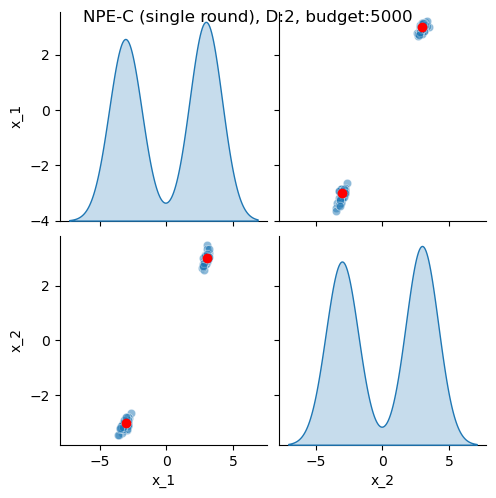

In [11]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=5000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

## D = 5

### budget: 1000

In [13]:
np.random.seed(21355)
torch.manual_seed(21)

In [14]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high = 10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = - 3
posterior_modes[1,:] = +3

In [15]:
density_estimator_fun = sbi.neural_nets.posterior_nn(
    model='nsf',
    hidden_features=100,# 20, # 50,
    num_transforms=8,# 2, # 5,
    z_score_x="independent",
    z_score_theta="independent",
)

In [16]:
inference = lfi.inference.from_sbi.NPECSingleRound(
    prior = prior.return_sbi_object(),
    simulator = sim.sample_pytorch,
    observation = observation,
)

In [17]:
samples, time = inference.fit_and_sample(budget=1000, num_samples=100, density_estimator=density_estimator_fun)

  0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 258 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 36.37 seconds


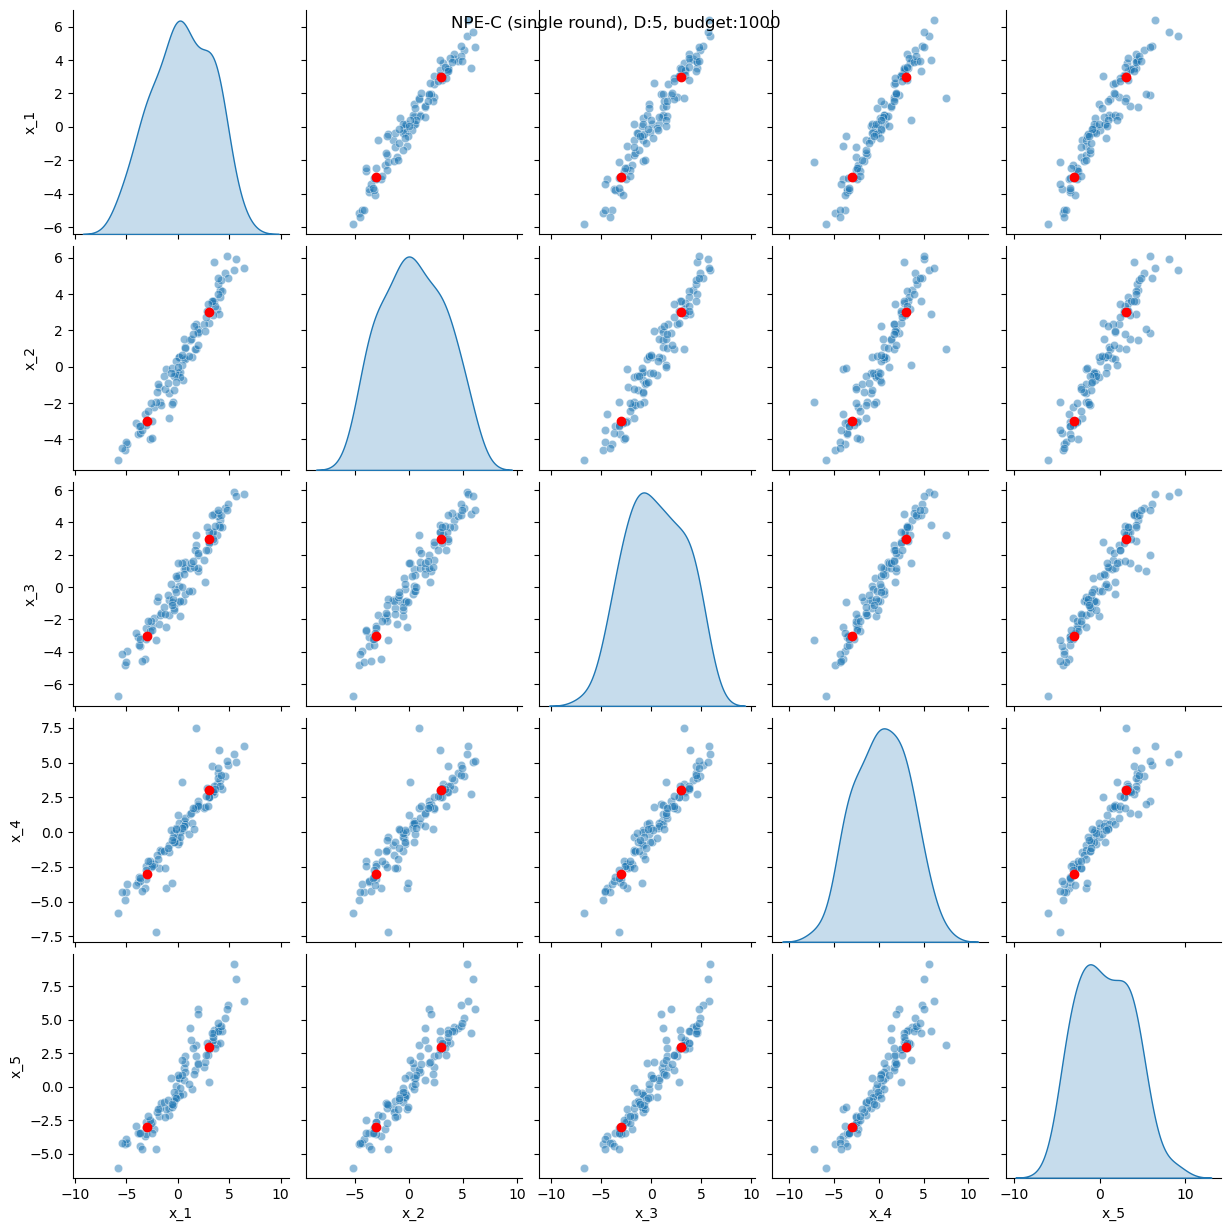

In [18]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=1000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

### budget: 5_000 

In [13]:
np.random.seed(21355)
torch.manual_seed(21)

In [14]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high = 10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = - 3
posterior_modes[1,:] = +3

In [15]:
density_estimator_fun = sbi.neural_nets.posterior_nn(
    model='nsf',
    hidden_features=100,# 20, # 50,
    num_transforms=8,# 2, # 5,
    z_score_x="independent",
    z_score_theta="independent",
)

In [16]:
inference = lfi.inference.from_sbi.NPECSingleRound(
    prior = prior.return_sbi_object(),
    simulator = sim.sample_pytorch,
    observation = observation,
)

In [18]:
samples, time = inference.fit_and_sample(budget=5000, num_samples=100, density_estimator=density_estimator_fun)

  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 217 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 222.47 seconds


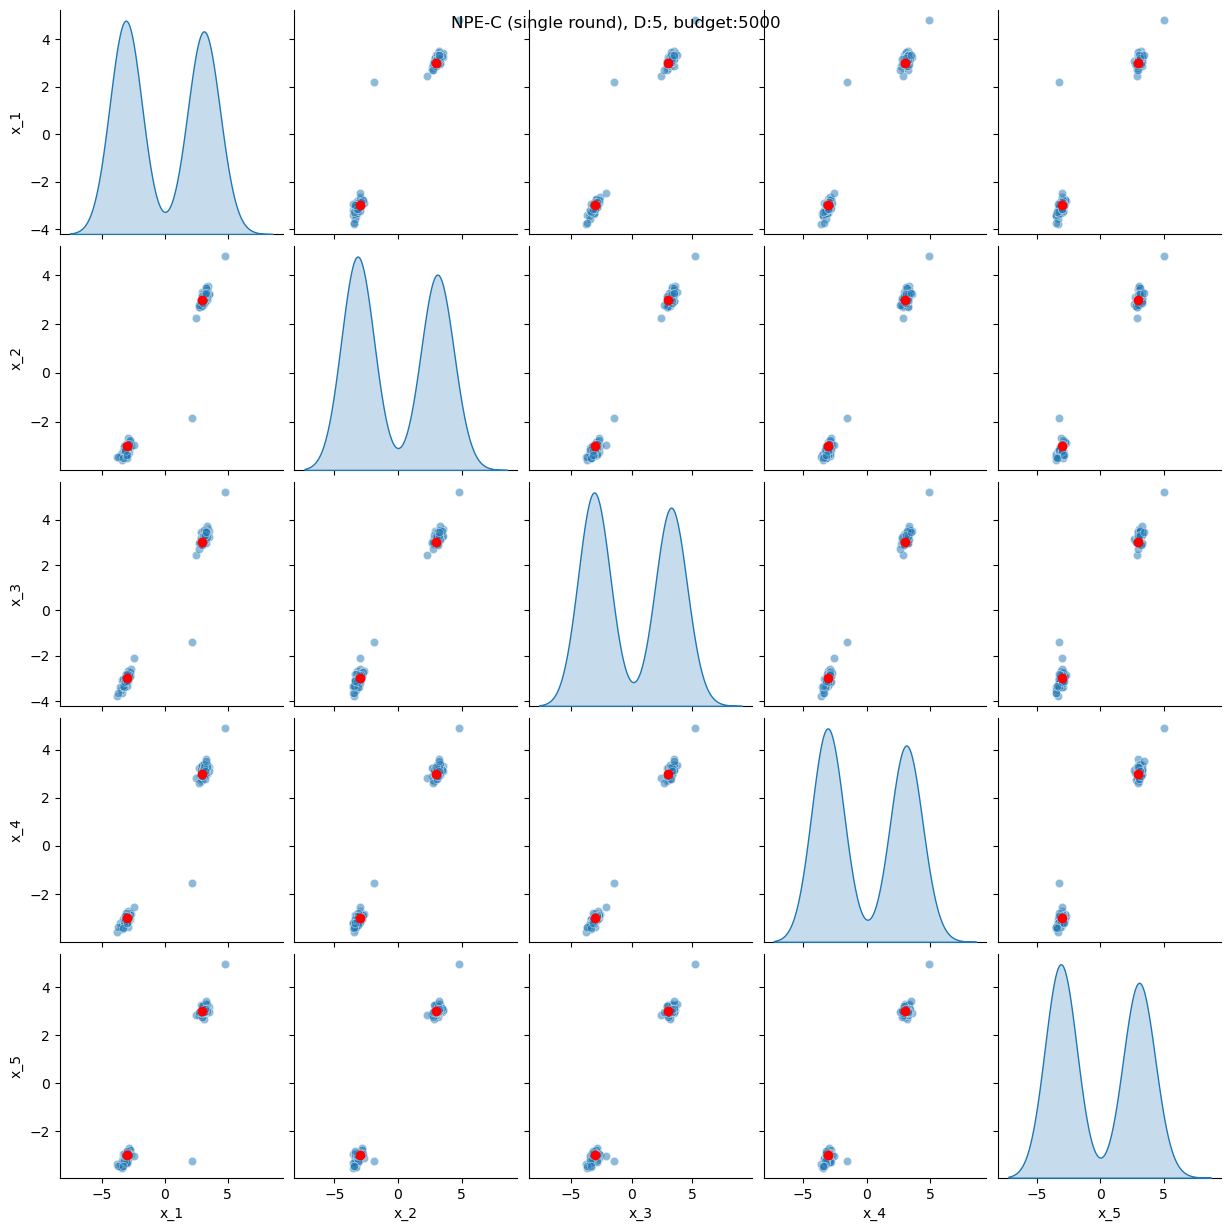

In [19]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=5000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

## D = 10

### budget: 5000

In [20]:
np.random.seed(21355)
torch.manual_seed(21)

In [21]:
D = 10
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high = 10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = - 3
posterior_modes[1,:] = +3

In [22]:
inference = lfi.inference.from_sbi.NPECSingleRound(
    prior = prior.return_sbi_object(),
    simulator = sim.sample_pytorch,
    observation = observation,
)

In [24]:
samples, time = inference.fit_and_sample(budget=5000, num_samples=100, density_estimator = density_estimator_fun)

  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 139 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 169.97 seconds


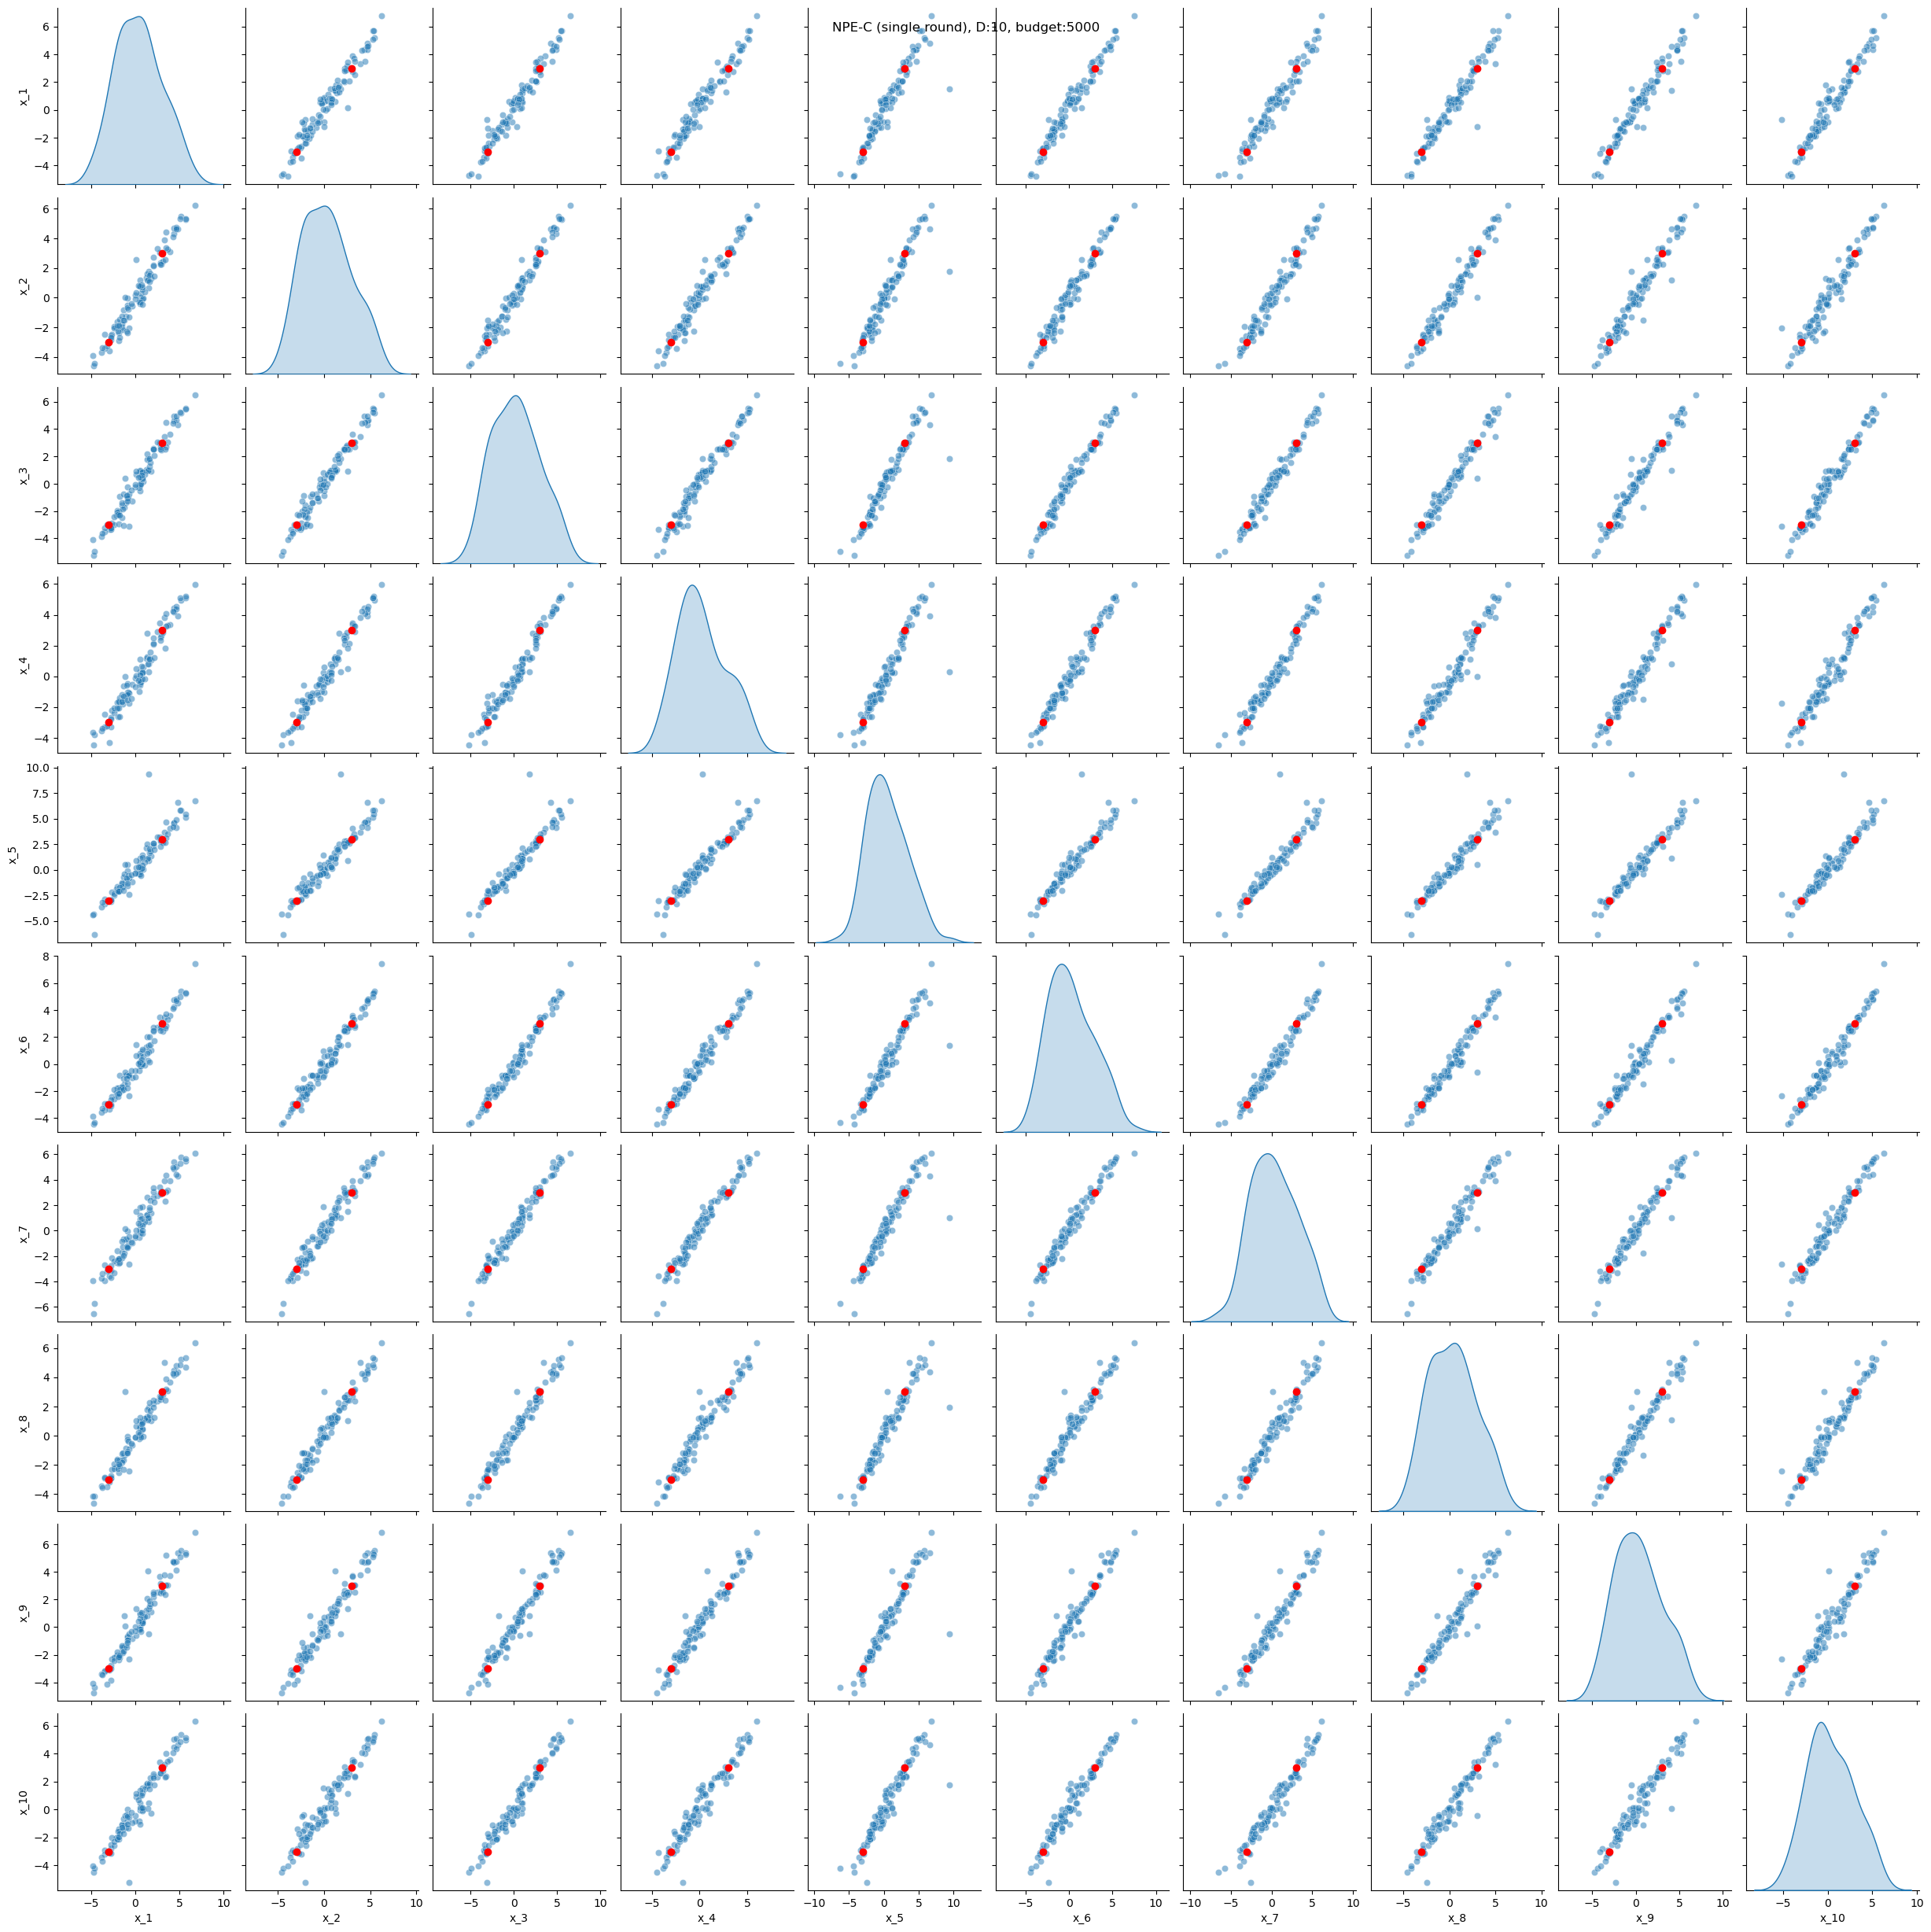

In [25]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=5000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

### budget: 15000

In [28]:
np.random.seed(21355)
torch.manual_seed(21)

In [29]:
D = 10
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high = 10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = - 3
posterior_modes[1,:] = +3

In [30]:
inference = lfi.inference.from_sbi.NPECSingleRound(
    prior = prior.return_sbi_object(),
    simulator = sim.sample_pytorch,
    observation = observation,
)

In [31]:
samples, time = inference.fit_and_sample(budget=15000, num_samples=100, density_estimator = density_estimator_fun)

  0%|          | 0/15000 [00:00<?, ?it/s]

 Neural network successfully converged after 256 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 929.39 seconds


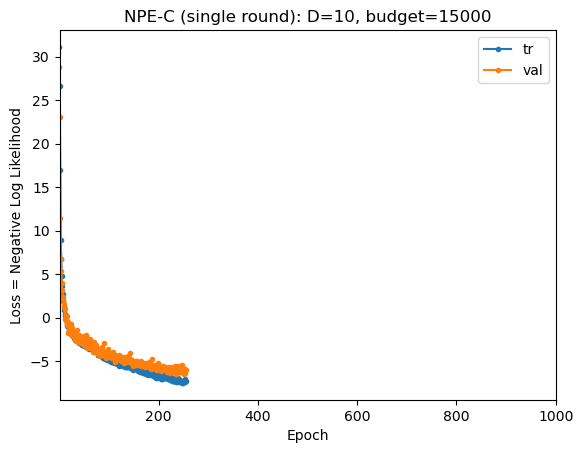

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'NPE-C (single round): D=10, budget=15000'}, xlabel='Epoch', ylabel='Loss = Negative Log Likelihood'>)

In [32]:
inference.plot_training_summary(budget=15_000)

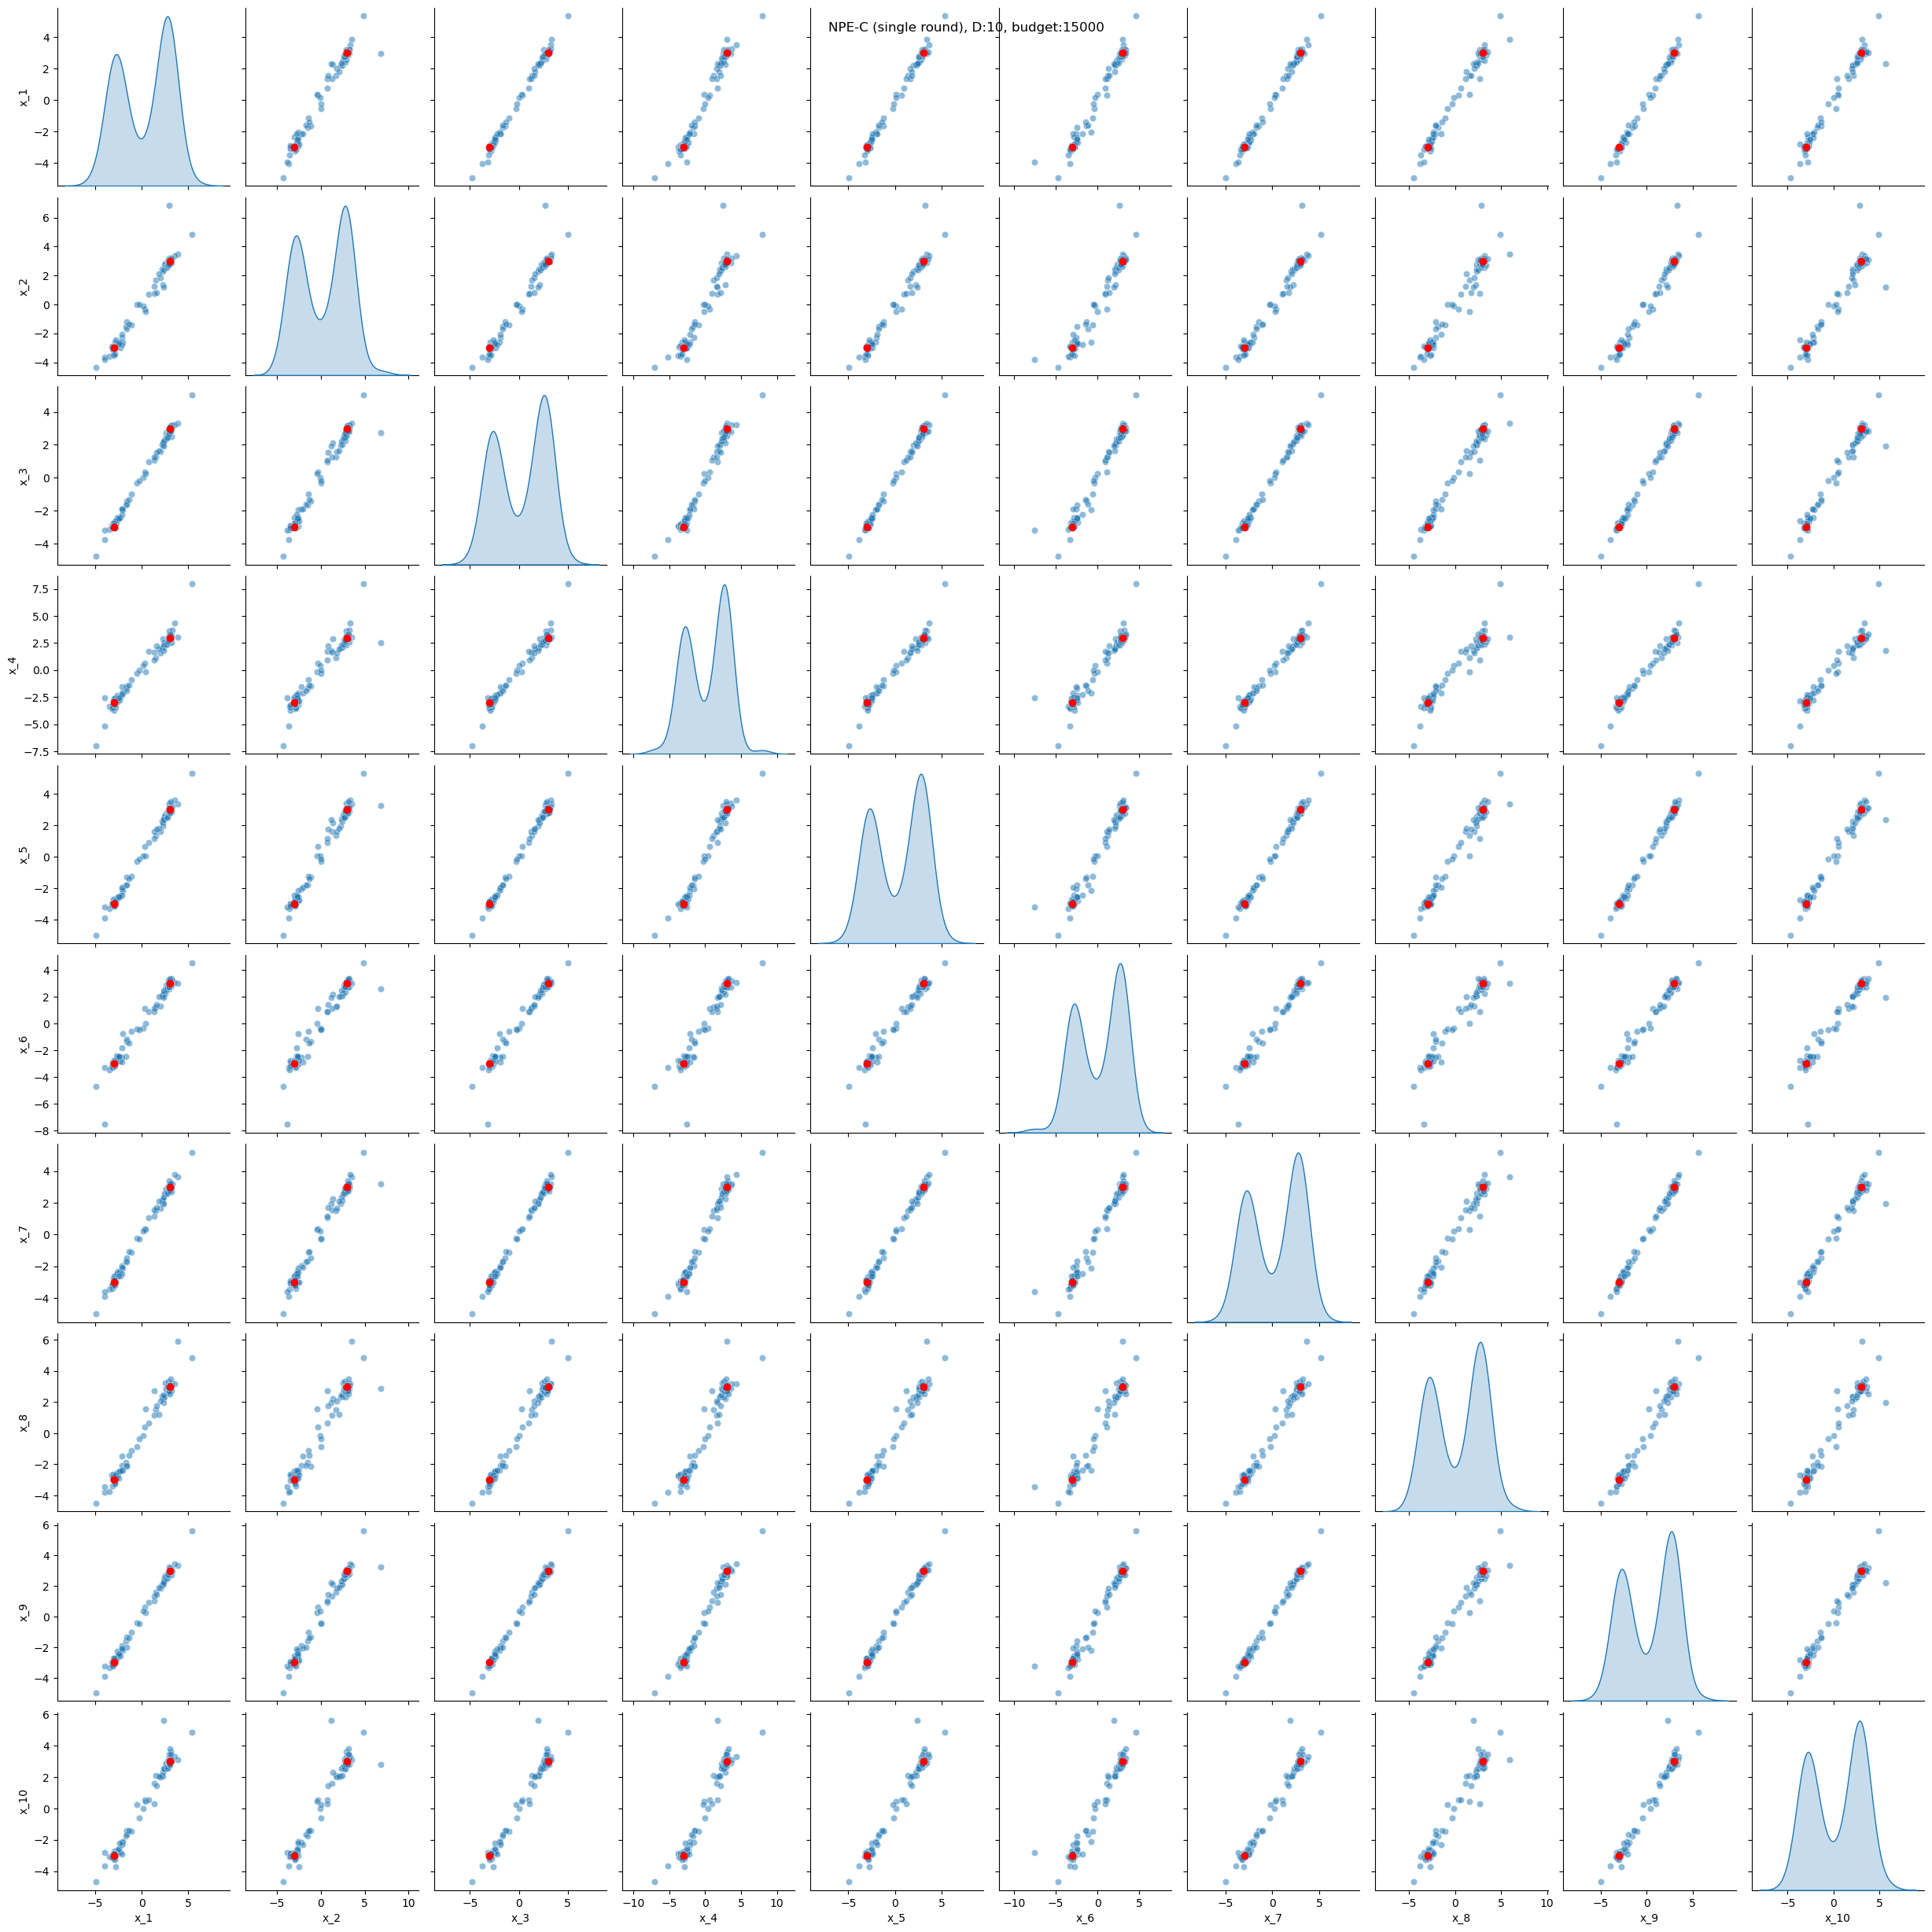

In [33]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=15000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

### budget: 30_000

In [34]:
np.random.seed(21355)
torch.manual_seed(21)

In [35]:
D = 10
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high = 10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = - 3
posterior_modes[1,:] = +3

In [36]:
inference = lfi.inference.from_sbi.NPECSingleRound(
    prior = prior.return_sbi_object(),
    simulator = sim.sample_pytorch,
    observation = observation,
)

In [37]:
samples, time = inference.fit_and_sample(budget=30000, num_samples=100, density_estimator = density_estimator_fun)

  0%|          | 0/30000 [00:00<?, ?it/s]

 Neural network successfully converged after 124 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 890.05 seconds


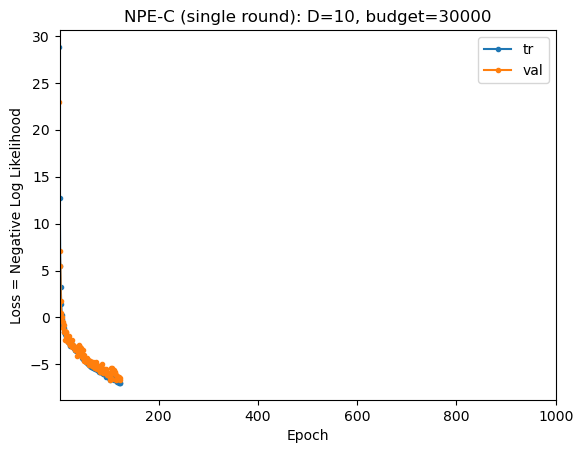

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'NPE-C (single round): D=10, budget=30000'}, xlabel='Epoch', ylabel='Loss = Negative Log Likelihood'>)

In [38]:
inference.plot_training_summary(budget=30_000)

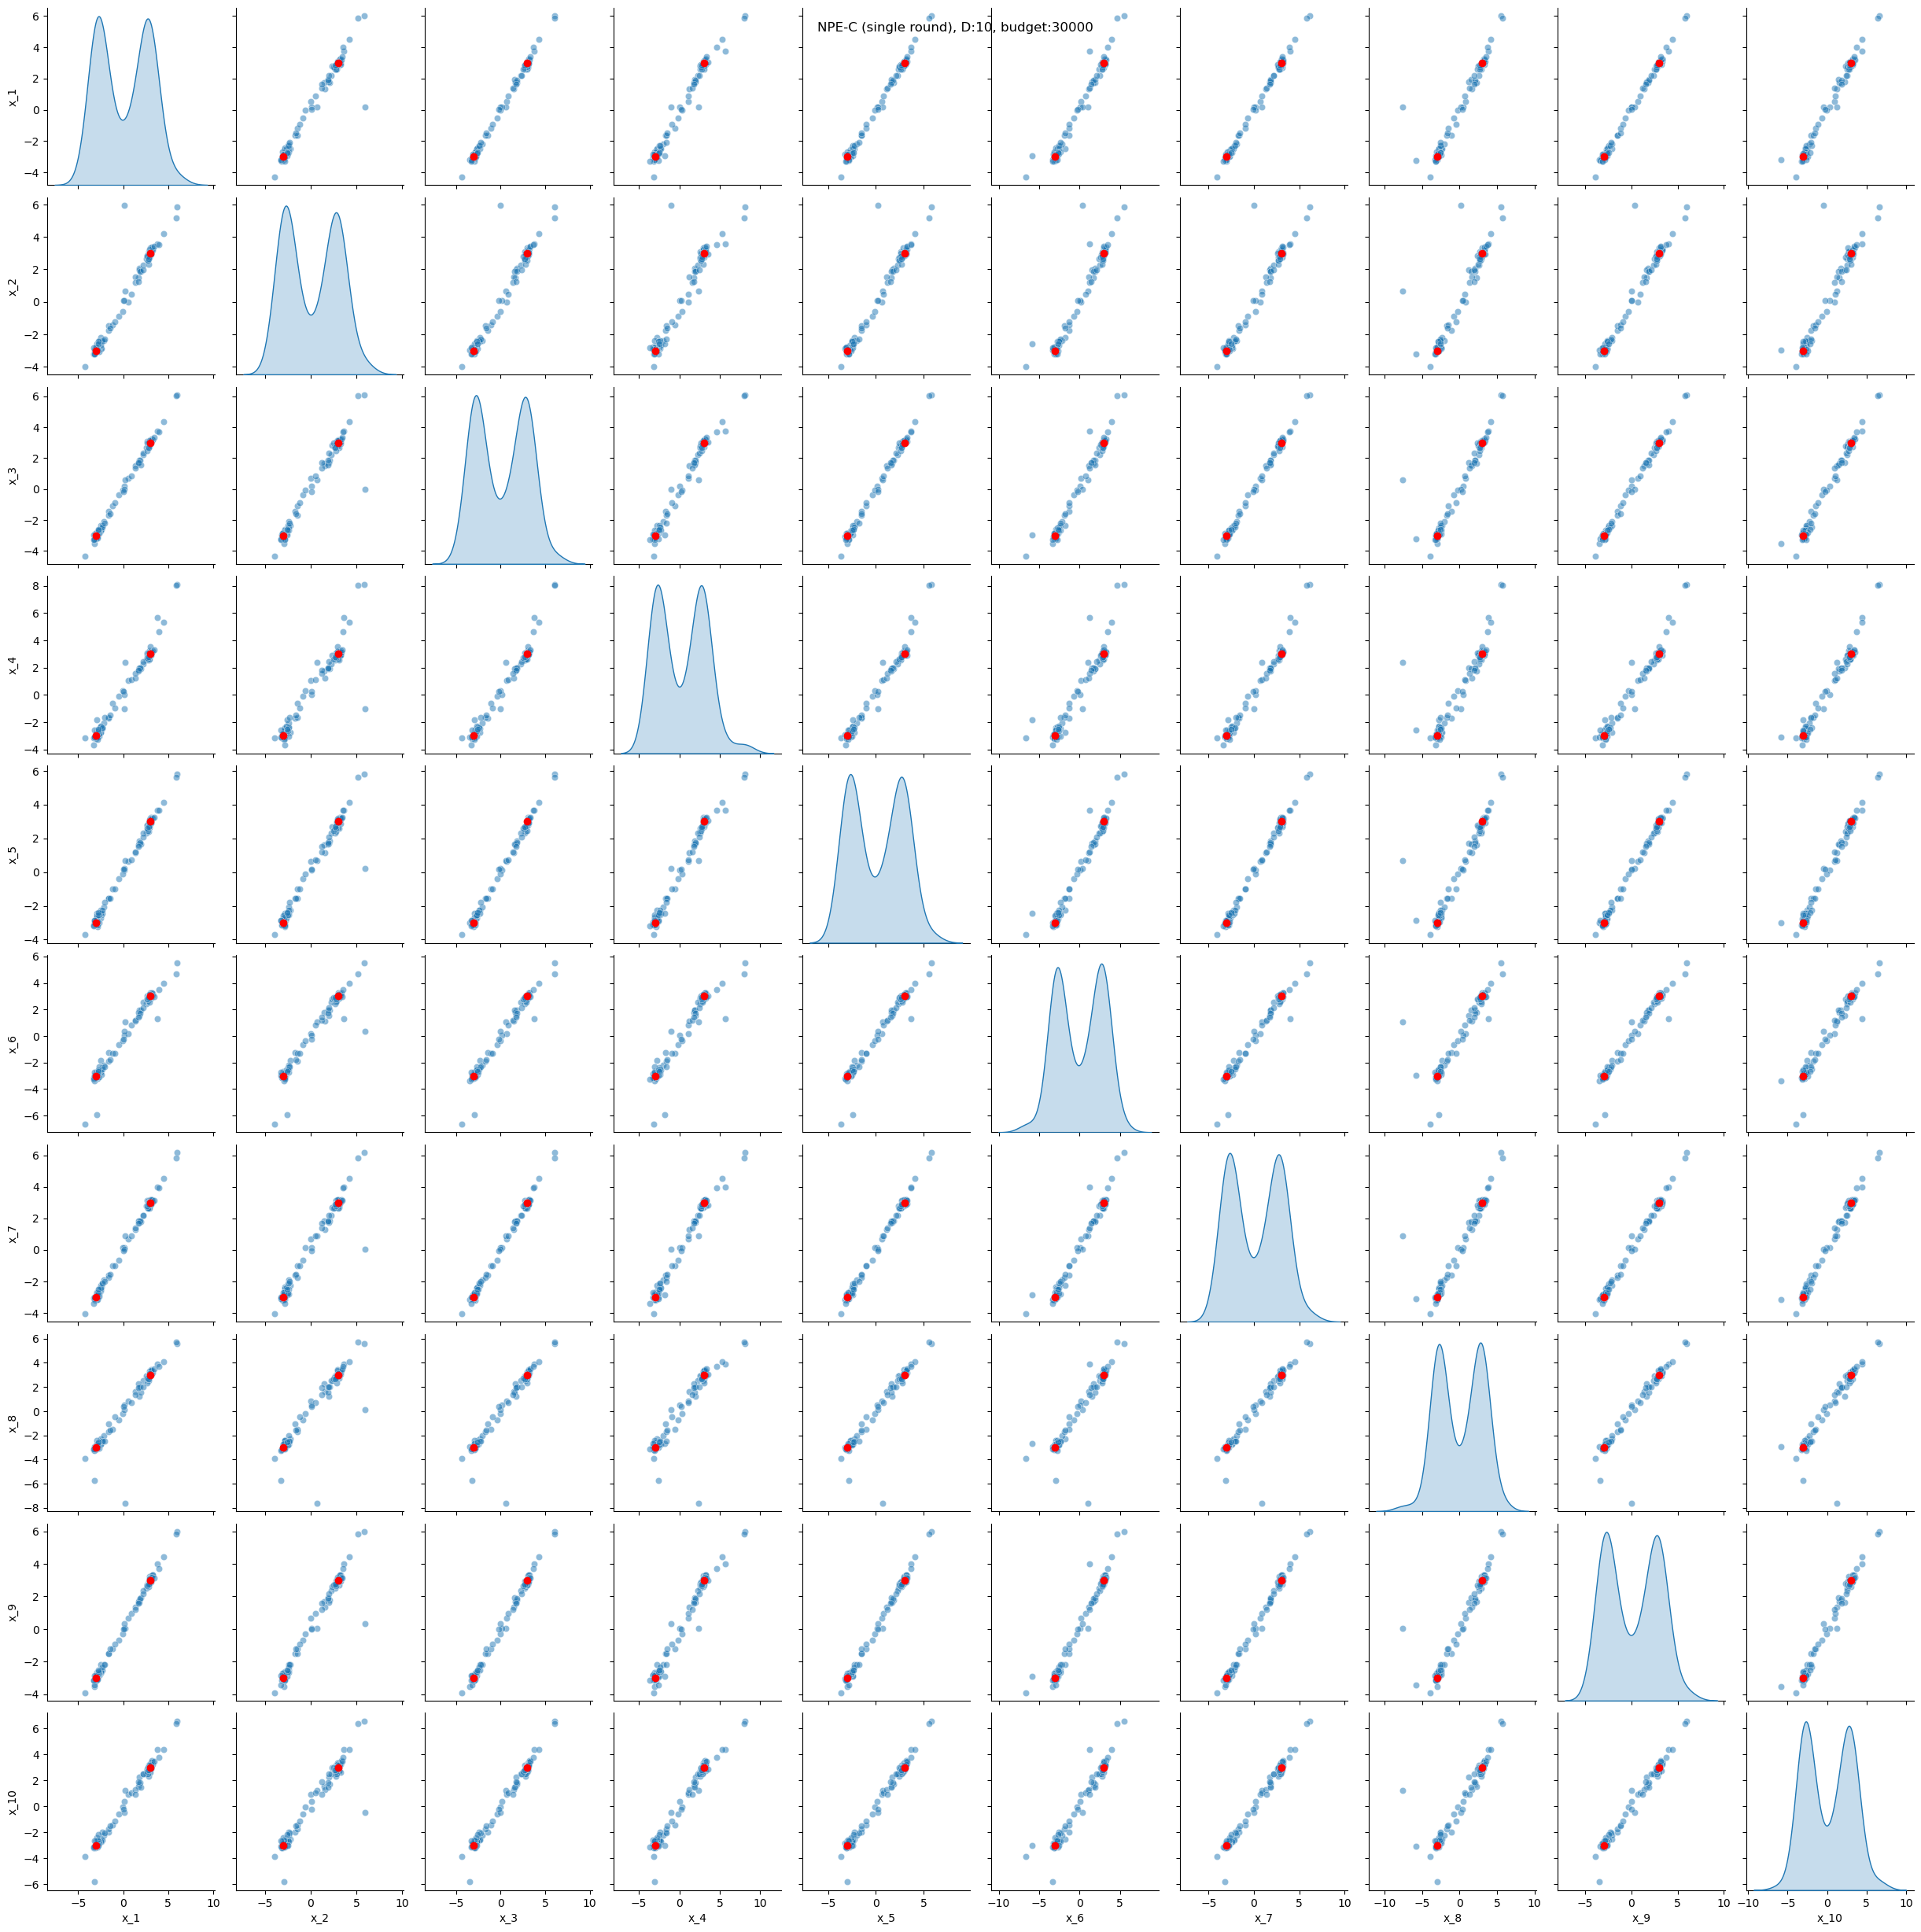

In [39]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=30000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)